# KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression

# confusion_matrix, classification_report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

In [3]:
target = 'Species'
x = data.drop(target, axis=1)
y = data[target]

In [4]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=2022)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


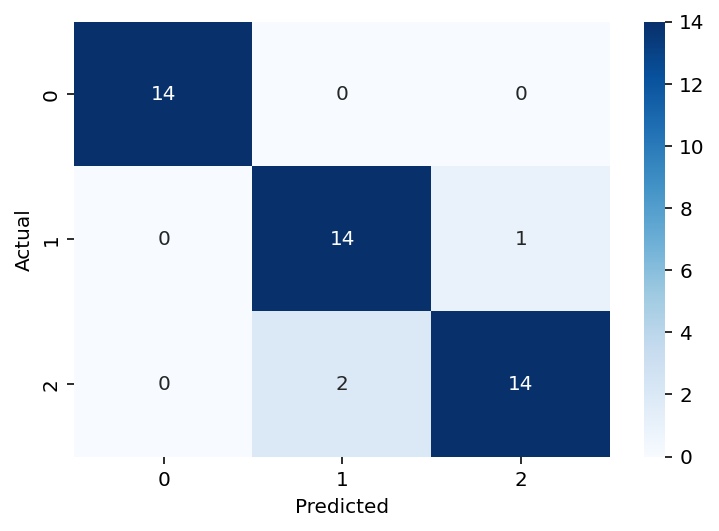

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

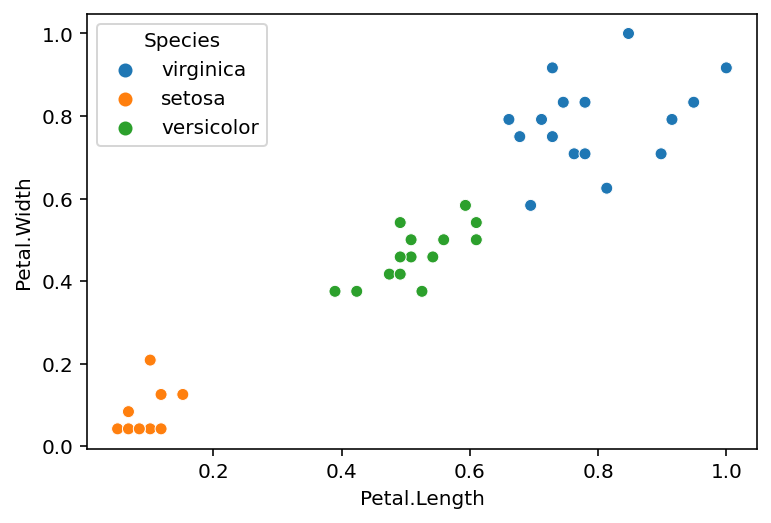

In [9]:
sns.scatterplot(x=x_test['Petal.Length'], y=x_test['Petal.Width'], hue=y_test)
plt.show()

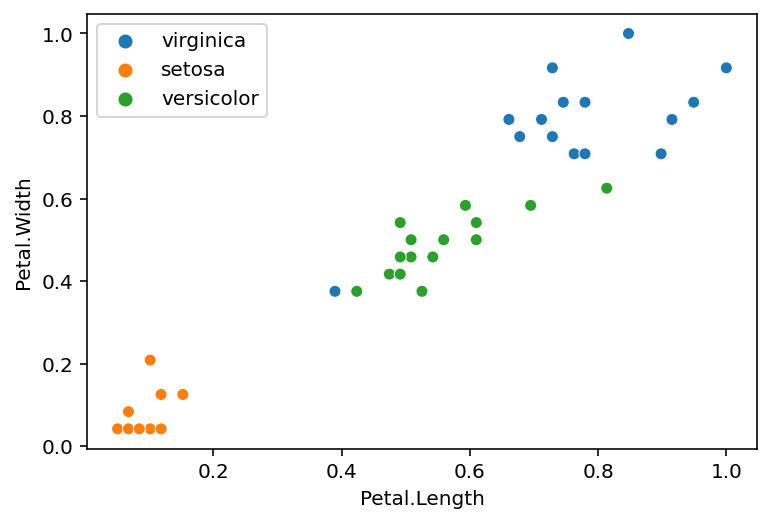

In [10]:
sns.scatterplot(x=x_test['Petal.Length'], y=x_test['Petal.Width'], hue=y_pred)
plt.show()

In [11]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]


In [12]:
print(precision_score(y_test, y_pred, average=None))

[1.         0.875      0.93333333]


In [13]:
print(recall_score(y_test, y_pred, average=None))

[1.         0.93333333 0.875     ]


In [14]:
print(f1_score(y_test, y_pred, average=None))

[1.         0.90322581 0.90322581]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



# KNeighborsClassifier

In [16]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [17]:
# # 시각화 모듈 불러오기
# from sklearn import tree

# fig = plt.figure(figsize=(30, 30))
# mytree = tree.plot_tree(model, feature_names=x.columns,  
#                         class_names=['setosa', 'versicolor', 'virginica'], 
#                         filled=True)

In [18]:
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [19]:
model = DecisionTreeClassifier(random_state=2022)
# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=20)
# 확인
print(cv_score)
print('평균 :', cv_score.mean())
print('표준편차 :', cv_score.std())

[1.  1.  1.  1.  1.  1.  0.8 1.  0.8 1.  0.8 0.6 0.8 1.  0.8 1.  1.  1.
 1.  1. ]
평균 : 0.93
표준편차 : 0.11445523142259598


# Logistic Regression

In [20]:
model = LogisticRegression(max_iter=500) # max_iter = 500
# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=30)
# 확인
print(cv_score)
print('평균 :', cv_score.mean())
print('표준편차 :', cv_score.std())

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.75       1.
 0.75       1.         0.75       0.66666667 1.         1.
 0.66666667 0.66666667 0.66666667 0.66666667 1.         1.
 1.         1.         1.         1.         1.         1.        ]
평균 : 0.9194444444444444
표준편차 : 0.13520103915153286


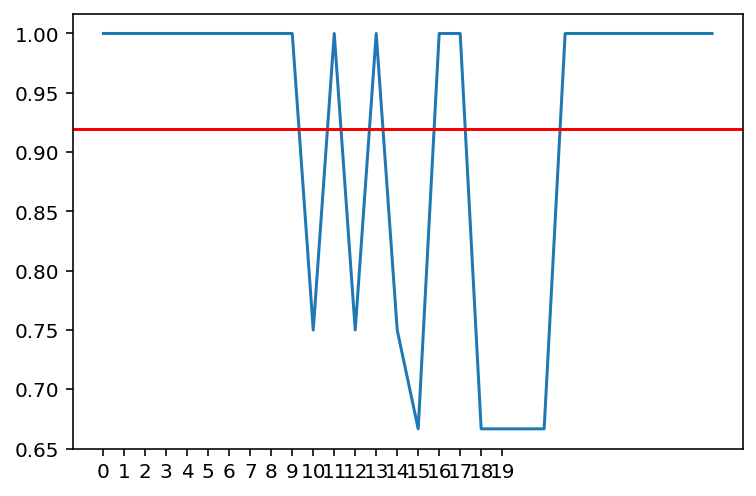

In [21]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 20))
plt.show()